
<h1><center><strong>Human Resources</strong></center></h1>


---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)<br>
  - **3.2** [**Importing Libraries**](#Section32)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Statistics**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)
  - **5.2** [**Identification & Handling of Missing Data**](#Section52)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Post Profiling Report**](#Section71)<br>
  - **7.2** [**Feature Selection**](#Section72)<br>
  - **7.3** [**Encoding the Categorical Data**](#Section73)<br>
  - **7.4** [**Data Preparation**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Model Development & Evaluation without Tuning**](#Section81)<br>
  - **8.2** [**Hyperparameter Tuning**](#Section82)<br>
  - **8.3** [**Model Development & Evaluation after Tuning**](#Section83)<br>
  - **8.4** [**Final Model**](#Section84)<br>
  
  
**9.** [**Conclusion**](#Section9)<br>



---
<a name = Section1></a>
# **1. Introduction**
---

- Your client for this project is the HR Department at a software company.

- They want to try a new initiative to retain employees.
The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
They only want to deal with the data that is related to permanent employees.


- Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.


<center><img src="https://projects.insaid.co/capstone2/hr.png" width="700px"></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

- This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- The second problem is these insights can't be aggregated and interlaced across all employees who have left.
- The third is that it is too late by the time the proposed policy changes take effect.

The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.


<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/sales_forecasting1.jpg" width="700px"></center>

**<h4>Consulting Goal :</h4>**

Your Role
- You are given datasets of past employees and their status (still employed or already left).
Your task is to build a classification model using the datasets.
- Because there was no machine learning model for this problem in the company, you don’t have quantifiable win condition. You need to build the best possible model.

Problem Specifics
- Deliverable: Predict whether an employee will stay or leave.
- Machine learning task: Classification
- Target variable: Status (Employed/Left)
- Win condition: N/A (best possible model)

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

**Note:** After installing, you need to restart the runtime. Make sure not to execute the cell again after restarting the runtime.

In [1]:
# !pip install -q pandas-profiling --upgrade

#installing mysql-connector library
!pip install mysql-connector

# need to install for to fix the cat_join error.
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 46.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp38-cp38-linux_x86_64.whl size=247965 sha256=e6890c1a1a3de497835678b5c6d4a2c3b47f63fd170569b6c63faaa7eabe2b44
  Stored in directory: /root/.cache/pip/wheels/57/e4/98/5feafb5c393dd2540e44b064a6f95832990d543e5b4f53ea8f
Successfully built mysql-connector
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.0 MB 26.5 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 38.5 MB/s eta 0:00:00
   

<a name = Section32></a>
### **3.2 Importing Libraries**

In [2]:
# For Numerical Python
import numpy as np                                                  # Importing for numeric python

# For Panel Data Analysis
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.precision', 4)

import mysql.connector as mysql                                     # importing 'mysql.connector' as mysql for convenient
from pandas_profiling import ProfileReport                          # impoting for pandas profiling report

# For Data Visualization
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib for visualization.
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# For Data Model Development
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier                     # Importing for Ada Boosting model
from sklearn.ensemble import GradientBoostingClassifier             # Importing for Gradient Boosting model
from sklearn.ensemble import RandomForestClassifier                 # Importing for Ada RandomForest model
from sklearn.ensemble import StackingClassifier                     # Importing for Stacking classidier model
from sklearn.neighbors import KNeighborsClassifier                  # Importing for K nearest neighbors model
from sklearn.svm import SVC

In [4]:
# For Machine Learning Model Evaluation
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score, classification_report

<a name = Section4></a>
## **4. Data Loading and Dataset Description**

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

**<h4>1. department_data</h4>**
This dataset contains information about each department. The schema of the dataset is as follows:

- dept_id – Unique Department Code
- dept_name – Name of the Department
- dept_head – Name of the Head of the Department

**<h4>2. employee_details_data**</h4>
This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

- employee_id – Unique ID Number for each employee
- age – Age of the employee
- gender – Gender of the employee
- marital_status – Marital Status of the employee

**<h4>3. employee_data**</h4>
This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

**Target variable**

- status – Current employment status (Employed / Left)

**Administrative information**

- department – Department to which the employees belong(ed) to
- salary – Salary level with respect to rest of their department
- tenure – Number of years at the company
- recently_promoted – Was the employee promoted in the last 3 years?
- employee_id – Unique ID Number for each employee.

**Workload information**
- n_projects – Number of projects employee has worked on
avg_monthly_hrs – Average number of hours worked per month

**Mutual evaluation information**
- satisfaction – Score for employee’s satisfaction with the company (higher is better)
- last_evaluation – Score for most recent evaluation of employee (higher is better)
-filed_complaint – Has the employee filed a formal complaint in the last 3 years?


<a name = Section41></a>
### **4.1 Data Loading**

In [5]:
## connecting to the database using 'connect()' method
db  =  mysql.connect(
host = "cpanel.insaid.co",
user = "student",
passwd = "student",
database = "Capstone2")

print(db) # it will print a connection object if everything is fine

In [6]:
dept_df = pd.read_sql('SELECT * FROM department_data', con=db)
emp_details_df = pd.read_sql('SELECT * FROM employee_details_data', con=db)
emp_df = pd.read_sql('SELECT * FROM employee_data', con=db)

<a name = Section42></a>
### **4.2 Data Description**

In [7]:
print("Shape of department data are :", dept_df.shape)
print("Shape of employee details data are :", emp_details_df.shape)
print("Shape of employee data are :", emp_df.shape)

Shape of department data are : (11, 3)
Shape of employee details data are : (14245, 4)
Shape of employee data are : (14150, 11)


In [8]:
dept_df.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [9]:
emp_details_df.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [10]:
emp_df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.8668,6,NaN,medium,0.1344,Left,4.0,124467
1,134.0,None,NaN,0.5557,2,NaN,low,0.5110,Left,3.0,112210
2,156.0,D00-SS,1.0,0.4741,2,NaN,medium,0.4051,Left,3.0,126150
3,256.0,D00-SP,NaN,0.9614,6,NaN,low,0.1530,Left,4.0,125346
4,146.0,D00-SS,NaN,0.5073,2,NaN,medium,0.4348,Left,3.0,113707


In [11]:
dept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [12]:
emp_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [13]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [14]:
df=pd.merge(emp_details_df, emp_df, how="inner", on="employee_id")
df.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,113558,43,Male,Married,111.0,D00-PR,NaN,0.7540,5,1.0,medium,0.9212,Employed,4.0
1,112256,24,Female,Unmarried,201.0,D00-MN,NaN,0.9645,3,NaN,medium,0.5685,Employed,3.0
2,112586,22,Female,Unmarried,239.0,D00-SS,NaN,0.7565,3,NaN,low,0.1448,Employed,6.0
3,108071,36,Male,Married,151.0,D00-PR,NaN,0.6083,5,NaN,medium,0.2103,Employed,6.0
4,116915,38,Male,Married,259.0,-IT,NaN,0.7492,4,NaN,medium,0.8885,Employed,3.0


In [15]:
df.rename(columns = {'department':'dept_id'}, inplace = True)

In [16]:
df_final=pd.merge(df, dept_df, how="left", on="dept_id")
df_final.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,dept_id,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_name,dept_head
0,113558,43,Male,Married,111.0,D00-PR,NaN,0.7540,5,1.0,medium,0.9212,Employed,4.0,Procurement,Louie Viles
1,112256,24,Female,Unmarried,201.0,D00-MN,NaN,0.9645,3,NaN,medium,0.5685,Employed,3.0,Management,Ellie Trafton
2,112586,22,Female,Unmarried,239.0,D00-SS,NaN,0.7565,3,NaN,low,0.1448,Employed,6.0,Sales,Edward J Bayley
3,108071,36,Male,Married,151.0,D00-PR,NaN,0.6083,5,NaN,medium,0.2103,Employed,6.0,Procurement,Louie Viles
4,116915,38,Male,Married,259.0,-IT,NaN,0.7492,4,NaN,medium,0.8885,Employed,3.0,NaN,NaN


In [17]:
df_final.duplicated().sum()

29

In [18]:
df_final.describe()

,employee_id,age,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14145.0000,14145.0000,14145.0000,2046.0,12658.0000,14145.0000,297.0,13995.0000,13995.0000
mean,112120.3688,32.8986,199.9871,1.0,0.7184,3.7779,1.0,0.6213,3.4993
std,8492.0994,9.9789,50.8282,0.0,0.1731,1.2499,0.0,0.2504,1.4628
min,100101.0000,22.0000,49.0000,1.0,0.3162,1.0000,1.0,0.0401,2.0000
25%,105780.0000,24.0000,155.0000,1.0,0.5638,3.0000,1.0,0.4504,3.0000
50%,111296.0000,29.0000,199.0000,1.0,0.7246,4.0000,1.0,0.6525,3.0000
75%,116653.0000,41.0000,245.0000,1.0,0.8714,5.0000,1.0,0.8250,4.0000
max,148988.0000,57.0000,310.0000,1.0,1.0000,7.0000,1.0,1.0000,10.0000


<a name = Section5></a>
## **5. Data Pre-Processing**

<a name = Section51></a>
### **5.1 Pandas_Profile Report**

In [19]:
# profile = ProfileReport(df_final, progress_bar=False, minimal=True)
# profile.to_file(output_file="Pre_Profiling_Report.html")
# print('Pre-Profiling Accomplished!')

In [20]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre_Profiling_Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation**

- dept_id has 706 (5.0%) missing values
- filed_complaint has 12075 (85.5%) missing values
- last_evaluation has 1487 (10.5%) missing values
- recently_promoted has 13819 (97.9%) missing values
- satisfaction has 150 (1.1%) missing values
- tenure has 150 (1.1%) missing values
- dept_name has 913 (6.5%) missing values
- dept_head has 913 (6.5%) missing values
- 29 records are duplicates.
- For full details checkout the report.

<a name = Section52></a>
### **5.2 Dealing with Missing Values**

In [21]:
#removing duplicates records
df_final.drop_duplicates(inplace=True)
print("The number of duplicated records are: ", df_final.duplicated().sum())

The number of duplicated records are:  0


**Before Handling Null Data**
- First, we will check the **number** of missing values in each column.

In [22]:
df_miss= pd.DataFrame(index=df_final.columns.values)
df_miss["missing"]= df_final.isna().sum().values
df_miss['missing %age']=np.round(df_final.isna().sum().values/df_final.shape[0], decimals=4)*100
df_miss.transpose()

,employee_id,age,gender,marital_status,avg_monthly_hrs,dept_id,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_name,dept_head
missing,0.0,0.0,0.0,0.0,0.0,706.0,12075.00,1487.00,0.0,13819.0,0.0,150.00,0.0,150.00,913.00,913.00
missing %age,0.0,0.0,0.0,0.0,0.0,5.0,85.54,10.53,0.0,97.9,0.0,1.06,0.0,1.06,6.47,6.47


In [23]:
def Data_Prep(data):
  #filling the missing "None" dept with "D00-OTHER" and "-IT" with "D00-OTHER"
	data.loc[(data['dept_id'].isna()), 'dept_id'] ='D00-OTHER'
	data.loc[(data['dept_id']=='-IT'), 'dept_id'] ='D00-IT'
	#filling the missing dept_name and dept_head based on dept_id
	data.loc[(data['dept_id']=='D00-IT') & (data['dept_name'].isna()), 'dept_name']= 'IT'
	data.loc[(data['dept_id']=='D00-IT') & (data['dept_head'].isna()), 'dept_head']= 'Henry Adey'
	#filling the missing dept_name and dept_head as 'Other'
	data.loc[(data['dept_name'].isna()), 'dept_name'] ='Other'
	data.loc[(data['dept_head'].isna()), 'dept_head'] ='Other'
	#filling the missing the filed complaint with 0.0
	data['filed_complaint'].fillna(0.0, inplace=True)
	#filling the missing last_evaluation with median value
	data['last_evaluation'].fillna(data['last_evaluation'].median(), inplace=True)
	#filling the missing the recently_promoted with 0.0 as 1.0 = promoted and 0.0 = not promoted
	data['recently_promoted'].fillna(0.0, inplace=True)
	#filling the missing satisfaction and tenure with median value
	data['satisfaction'].fillna(data['satisfaction'].median(), inplace=True)
	data['tenure'].fillna(data['tenure'].median(), inplace=True)
	return data

In [24]:
df_final=Data_Prep(df_final)

**After handling missing data**

In [25]:
df_miss= pd.DataFrame(index=df_final.columns.values)
df_miss["missing"]= df_final.isna().sum().values
df_miss['missing %age']=np.round(df_final.isna().sum().values/df_final.shape[0], decimals=4)*100
df_miss.transpose()

,employee_id,age,gender,marital_status,avg_monthly_hrs,dept_id,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_name,dept_head
missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_final.duplicated().sum()

0

**Observation:** 
- there are no any missing values in our dataset
- there are no any duplicate records.

In [27]:
df_final.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,dept_id,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_name,dept_head
0,113558,43,Male,Married,111.0,D00-PR,0.0,0.7540,5,1.0,medium,0.9212,Employed,4.0,Procurement,Louie Viles
1,112256,24,Female,Unmarried,201.0,D00-MN,0.0,0.9645,3,0.0,medium,0.5685,Employed,3.0,Management,Ellie Trafton
2,112586,22,Female,Unmarried,239.0,D00-SS,0.0,0.7565,3,0.0,low,0.1448,Employed,6.0,Sales,Edward J Bayley
3,108071,36,Male,Married,151.0,D00-PR,0.0,0.6083,5,0.0,medium,0.2103,Employed,6.0,Procurement,Louie Viles
4,116915,38,Male,Married,259.0,D00-IT,0.0,0.7492,4,0.0,medium,0.8885,Employed,3.0,IT,Henry Adey


In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14144
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14116 non-null  int64  
 1   age                14116 non-null  int64  
 2   gender             14116 non-null  object 
 3   marital_status     14116 non-null  object 
 4   avg_monthly_hrs    14116 non-null  float64
 5   dept_id            14116 non-null  object 
 6   filed_complaint    14116 non-null  float64
 7   last_evaluation    14116 non-null  float64
 8   n_projects         14116 non-null  int64  
 9   recently_promoted  14116 non-null  float64
 10  salary             14116 non-null  object 
 11  satisfaction       14116 non-null  float64
 12  status             14116 non-null  object 
 13  tenure             14116 non-null  float64
 14  dept_name          14116 non-null  object 
 15  dept_head          14116 non-null  object 
dtypes: float64(6), int64(3

<a name = Section6></a>
## **6. Exploratory Data Analysis**

### **Question 1: Whats the frequecy Distribution of status?** 

In [29]:
df_final.skew()

employee_id          1.3047
age                  0.7009
avg_monthly_hrs      0.0164
filed_complaint      2.0214
last_evaluation     -0.0802
n_projects           0.3153
recently_promoted    6.6753
satisfaction        -0.4814
tenure               1.8719
dtype: float64

In [30]:
df_final['status'].value_counts()

Employed    10761
Left         3355
Name: status, dtype: int64

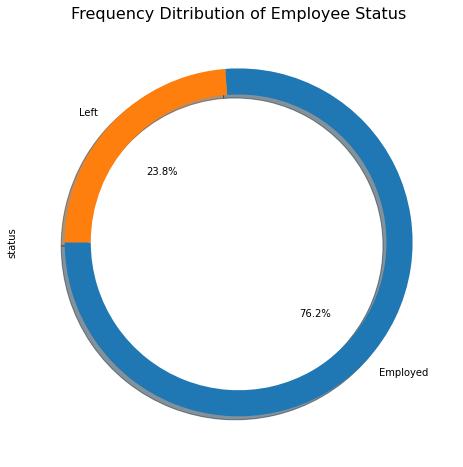

In [31]:
plt.figure(figsize=(15,8))
# sns.countplot(df_final['status'])
df_final['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
            startangle=180, shadow=True, wedgeprops=dict(width=0.15))

plt.title("Frequency Ditribution of Employee Status", size=16)
plt.show()

**Observation**: looks like 24% employee left the organisation in current data.

### **Question 2: Whats the association between Gender and Employee status**

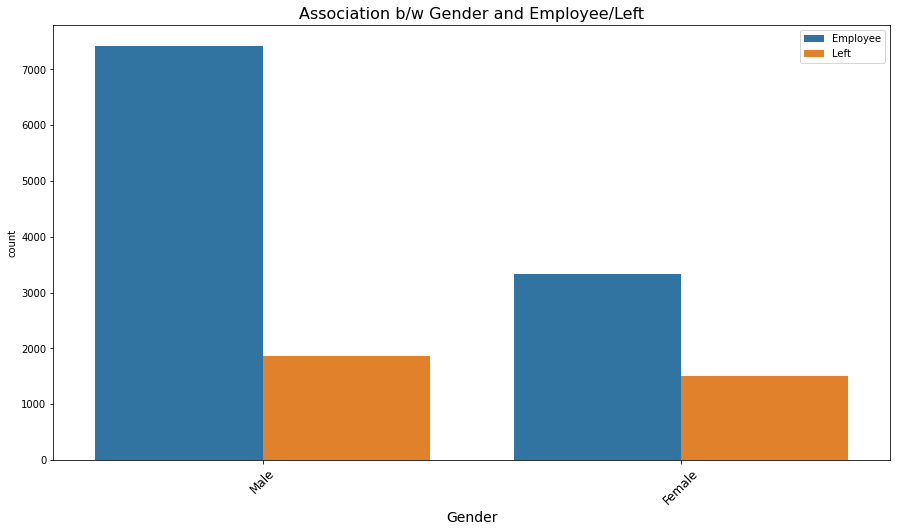

In [32]:
plt.figure(figsize=[15,8])
sns.countplot(x='gender',hue='status', data=df_final)
plt.xlabel('Gender', size = 14)
plt.xticks(rotation=45, size=12)
plt.legend(labels = ['Employee', 'Left'], loc = 'upper right')
plt.title('Association b/w Gender and Employee/Left', size = 16)
# patches = ax.patches

# total = len(df_final['status'])
# for p in ax.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_width()/total)
#         x = p.get_x() + p.get_width() + 0.02
#         y = p.get_y() + p.get_height()/2
#         ax.annotate(percentage, (x, y))
plt.show()

**Observation**: Mostly Female employee left the orgnisation as compare to Male employee.

### **Question 3:Whats the association between Age and Employee status**

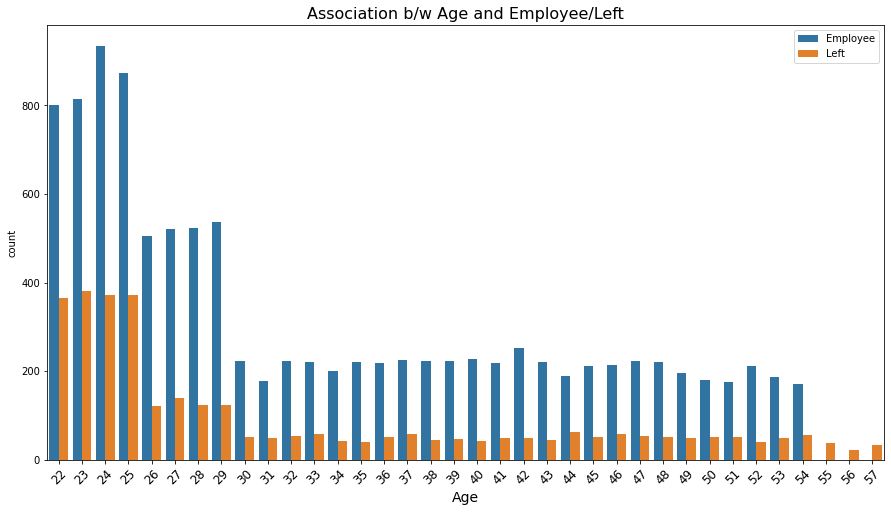

In [33]:
plt.figure(figsize=[15,8])
sns.countplot(x='age', hue='status', data=df_final)
plt.xlabel('Age', size = 14)
plt.xticks(rotation=45, size=12)
plt.legend(labels = ['Employee', 'Left'], loc = 'upper right')
plt.title('Association b/w Age and Employee/Left', size = 16)
plt.show()

### **Question 4: Whats the association between recently prmoted and Employee status?**

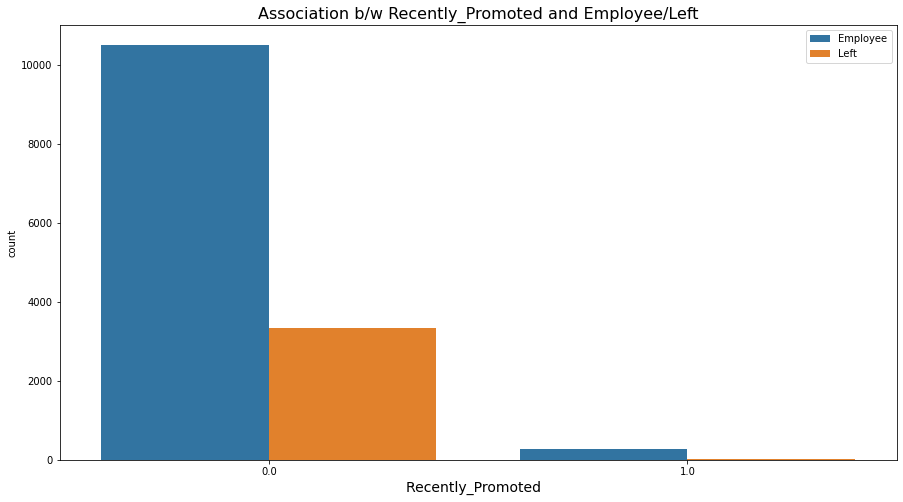

In [34]:
plt.figure(figsize=[15,8])
sns.countplot(x='recently_promoted', hue='status', data=df_final)
plt.xlabel('Recently_Promoted  ', size = 14)
plt.legend(labels = ['Employee', 'Left'], loc = 'upper right')
plt.title('Association b/w Recently_Promoted and Employee/Left', size = 16)
plt.show()

**Observation**: Most probably Non promoted employee left the organisation.

### **Question 5: Correlation of different features?**


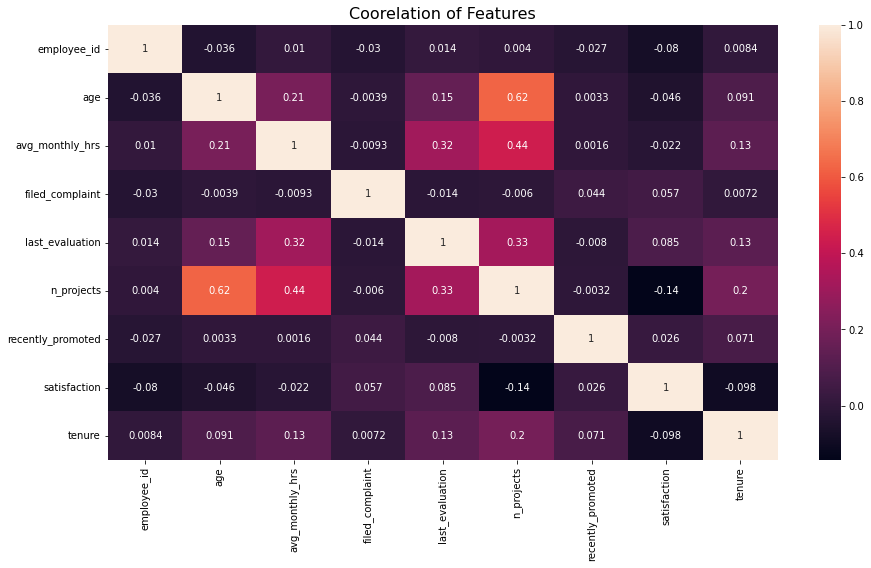

In [35]:
plt.figure(figsize=[15,8])
sns.heatmap(df_final.corr(), annot=True)
plt.title('Coorelation of Features', size = 16)
plt.show()

**Observation:** 
- Age of the employee has high corelation with number of projects that they have been involved with
- The hours spent at work on an average is also somewhat related to the project count.
- Last evaluated score is also related in a sense to the average monthly hours spent at work."
- satisfaction and tenure are strongly negatively corleated with other.

### **Question 6: Distribution of avarage monthly hours wrt to employee salary feature?**


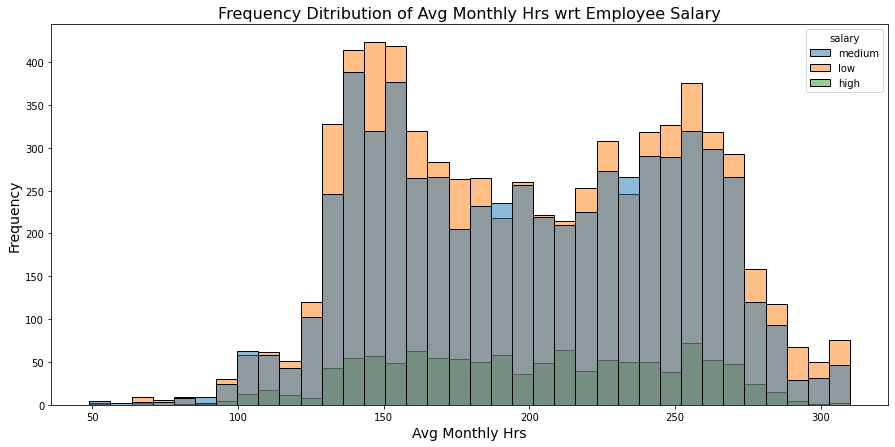

In [36]:
plt.figure(figsize=(15,7))
sns.histplot(x=df_final['avg_monthly_hrs'], hue=df_final['salary'], )
plt.xlabel("Avg Monthly Hrs", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Frequency Ditribution of Avg Monthly Hrs wrt Employee Salary", size=16)
plt.show()

**Observation:** Low and Medium salary employees have avg. working hours greater than high salary employees.

<a name = Section7></a>
## **7. Post Data Processing & Analysis**

<a name = Section71></a>
### **7.1 Post-Profiling Report**

- After  **filling missing value**, we will now look at the report again.

In [37]:
# profile = ProfileReport(df = df_final)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

In [38]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**


- For full details after the data processing checkout the report.

<a name = Section72></a>
### **7.2 Feature Selection**

In [39]:
df_final.columns

Index(['employee_id', 'age', 'gender', 'marital_status', 'avg_monthly_hrs',
       'dept_id', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure',
       'dept_name', 'dept_head'],
      dtype='object')

In [40]:
from scipy.stats import chi2_contingency 
def chi_test(var1, var2):
  table = pd.crosstab(var1, var2)
  _, p, _, _ = chi2_contingency(table)
  
  # interpret p-value
  alpha = 0.05
  print("p value is " + str(p))
  if p <= alpha:
    print('Dependent (reject H0)')
  else:
    print('Independent (H0 holds true)')

  return table  


In [41]:
chi_test(df_final['age'], df_final['status'])

p value is 2.3722964019032926e-92
Dependent (reject H0)


status,Employed,Left
age,,
22,800,366
23,814,382
24,935,373
25,874,372
26,504,122
27,522,140
28,523,124
29,536,124
30,224,51


In [42]:
#removing the unwanted features from dataset.
df_final.drop(columns=['employee_id', 'dept_id', 'dept_head', 'dept_name','age','gender','marital_status'], axis=1, inplace=True)
# df_final.drop(columns=['age','gender','marital_status'], axis=1, inplace=True)
print(df_final.shape)
df_final.head()

(14116, 9)


,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,111.0,0.0,0.7540,5,1.0,medium,0.9212,Employed,4.0
1,201.0,0.0,0.9645,3,0.0,medium,0.5685,Employed,3.0
2,239.0,0.0,0.7565,3,0.0,low,0.1448,Employed,6.0
3,151.0,0.0,0.6083,5,0.0,medium,0.2103,Employed,6.0
4,259.0,0.0,0.7492,4,0.0,medium,0.8885,Employed,3.0


<a name = Section73></a>
### **7.3 Encoding Categorical Data**

In [43]:
#encoding the categorical data through label encoding.

# def encoding(data):
#   le=LabelEncoder()
#   for i in data.columns:
#     if data[i].dtype == 'object' :
#       data[i]=le.fit_transform(data[i])
#   return data 

# df_hr = pd.get_dummies(df_final, columns=["gender", "marital_status", "salary"],  drop_first=True)
df_hr = pd.get_dummies(df_final, columns=["salary"],  drop_first=True)
df_hr.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,salary_low,salary_medium
0,111.0,0.0,0.7540,5,1.0,0.9212,Employed,4.0,0,1
1,201.0,0.0,0.9645,3,0.0,0.5685,Employed,3.0,0,1
2,239.0,0.0,0.7565,3,0.0,0.1448,Employed,6.0,1,0
3,151.0,0.0,0.6083,5,0.0,0.2103,Employed,6.0,0,1
4,259.0,0.0,0.7492,4,0.0,0.8885,Employed,3.0,0,1


In [44]:
df_hr['status']=np.where(df_hr['status'] == 'Left', 1, 0)
df_hr.head(5)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,salary_low,salary_medium
0,111.0,0.0,0.7540,5,1.0,0.9212,0,4.0,0,1
1,201.0,0.0,0.9645,3,0.0,0.5685,0,3.0,0,1
2,239.0,0.0,0.7565,3,0.0,0.1448,0,6.0,1,0
3,151.0,0.0,0.6083,5,0.0,0.2103,0,6.0,0,1
4,259.0,0.0,0.7492,4,0.0,0.8885,0,3.0,0,1


In [45]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14144
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   filed_complaint    14116 non-null  float64
 2   last_evaluation    14116 non-null  float64
 3   n_projects         14116 non-null  int64  
 4   recently_promoted  14116 non-null  float64
 5   satisfaction       14116 non-null  float64
 6   status             14116 non-null  int64  
 7   tenure             14116 non-null  float64
 8   salary_low         14116 non-null  uint8  
 9   salary_medium      14116 non-null  uint8  
dtypes: float64(6), int64(2), uint8(2)
memory usage: 1.5 MB


<a name = Section74></a>
### **7.4 Data Preparation**


- Now we will split our data in **training** and **testing** part for further development.


In [46]:
x=df_hr.drop('status', axis=1)
y=df_hr['status']

In [47]:
y.value_counts()

0    10761
1     3355
Name: status, dtype: int64

In [48]:
# def scaling(x):
#   sc=StandardScaler()
#   sc.fit_transform(x)
#   return x


In [49]:
# x=scaling(x)

In [50]:
# x.head()

**splitting the data into train and test**

In [51]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=42)
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (11292, 9) (11292,)
Testing Data Shape: (2824, 9) (2824,)


<a id = Section8></a>
## **8. Model Development & Evaluation**



- In this section we will **develop Random Forest Classifier, AdaBoostClassifier, GradientBoostingClassifier and LogisticRegression and K Nearest Neighbors using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **accuracy**, also we will check for **F1 score**.

<a name = Section81></a>
### **8.1 Model Development & Evaluation without tuning**

In [52]:
clf_list = [LogisticRegression(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), 
        KNeighborsClassifier()]


for clf in clf_list:
  clf.fit(X_train, y_train)
  y_train_pred = clf.predict(X_train)
  y_test_pred= clf.predict(X_test)

  print("Model Name: ", type(clf).__name__)

  print("Train Data Evaluation:")
  print("Confusion Matrix \n:", confusion_matrix(y_train, y_train_pred))
  print("Accuracy:", round(accuracy_score(y_train, y_train_pred), 2))
  print("Recall:", round(recall_score(y_train, y_train_pred), 2))
  print("Precision:", round(precision_score(y_train, y_train_pred), 2))
  print("F1 Score:", round(f1_score(y_train, y_train_pred), 2))
  
  print("\nTest Data Evaluation:")
  print("Confusion Matrix \n:", confusion_matrix(y_test, y_test_pred))
  print("Accuracy:", round(accuracy_score(y_test, y_test_pred), 2))
  print("Recall:", round(recall_score(y_test, y_test_pred), 2))
  print("Precision:", round(precision_score(y_test, y_test_pred), 2))
  print("F1 Score:", round(f1_score(y_test, y_test_pred), 2))
  print("***************************************")



Model Name:  LogisticRegression
Train Data Evaluation:
Confusion Matrix 
: [[7947  647]
 [1571 1127]]
Accuracy: 0.8
Recall: 0.42
Precision: 0.64
F1 Score: 0.5

Test Data Evaluation:
Confusion Matrix 
: [[2015  152]
 [ 374  283]]
Accuracy: 0.81
Recall: 0.43
Precision: 0.65
F1 Score: 0.52
***************************************
Model Name:  RandomForestClassifier
Train Data Evaluation:
Confusion Matrix 
: [[8594    0]
 [   2 2696]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0

Test Data Evaluation:
Confusion Matrix 
: [[2154   13]
 [  53  604]]
Accuracy: 0.98
Recall: 0.92
Precision: 0.98
F1 Score: 0.95
***************************************
Model Name:  AdaBoostClassifier
Train Data Evaluation:
Confusion Matrix 
: [[8264  330]
 [ 400 2298]]
Accuracy: 0.94
Recall: 0.85
Precision: 0.87
F1 Score: 0.86

Test Data Evaluation:
Confusion Matrix 
: [[2078   89]
 [ 101  556]]
Accuracy: 0.93
Recall: 0.85
Precision: 0.86
F1 Score: 0.85
***************************************
Model Name: 

In [ ]:
#checking the feature importance in data
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
pd.DataFrame({'Column_Names': X_train.columns, 'Feature_IMP':rf.feature_importances_ * 100})

,Column_Names,Feature_IMP
0,avg_monthly_hrs,18.3068
1,filed_complaint,0.6431
2,last_evaluation,10.7490
3,n_projects,19.8935
4,recently_promoted,0.1386
5,satisfaction,30.3042
6,tenure,19.0979
7,salary_low,0.5094
8,salary_medium,0.3575


<a name = Section82></a>
### **8.2 Hyperparameter Tuning**

- The **base-class** **Random Forest Classifier** and **Gradient Bosting Classiifer** models **perform well** on our data.

- We will **tune** these models to find the **optimal parameters**.

In [ ]:
# Creating a parameter grid for Random Forest and Gradient Boost
import time
from sklearn.model_selection import RandomizedSearchCV
param_random_rfc = { 'n_estimators': [50, 100, 500, 1000],
                  'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10],
                  'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
                  'criterion' :['gini', 'entropy', 'log_loss']}

param_random_grad = {'n_estimators': [50, 100, 500, 1000],
                    'loss': ['log_loss', 'deviance', 'exponential'],
                    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
                    'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]}
                  

# Putting the parameters in a list
param_grid = [param_random_rfc, param_random_grad]

i = 0

# Creating lists to store scores, models and parameters
best_scores = []
best_models = []
best_params = []

# Instantiating models
clfs = [RandomForestClassifier(), GradientBoostingClassifier()]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Applying RandomSearchCV on the model
  cv = RandomizedSearchCV(estimator=clf, param_distributions=param_grid[i], cv= 5)

  # Calculating start time
  start_time = time.time()

  # Fitting the model in train set
  cv.fit(X_train, y_train)

  # Calculating evaluated time
  evaluated_time = time.time()-start_time

  # Append best score, parameters and models in lists
  best_scores.append(cv.best_score_)
  best_params.append(cv.best_params_)
  best_models.append(cv.best_estimator_)

  # Print time taken for tuning
  print('Time taken for tuning', model_name ,' is: ', np.round(evaluated_time, 2), 'sec')
  print('----------------------------------------\n')
  i += 1

Time taken for tuning RandomForestClassifier  is:  177.07 sec
----------------------------------------

Time taken for tuning GradientBoostingClassifier  is:  269.76 sec
----------------------------------------



In [ ]:
print(best_models)
print(best_params)
print(best_scores)

[RandomForestClassifier(max_depth=9, min_samples_split=8, n_estimators=50), GradientBoostingClassifier(max_depth=6, min_samples_split=9, n_estimators=1000)]
[{'n_estimators': 50, 'min_samples_split': 8, 'max_depth': 9, 'criterion': 'gini'}, {'n_estimators': 1000, 'min_samples_split': 9, 'max_depth': 6, 'loss': 'deviance'}]
[0.9749383138639225, 0.9765321354087636]


<a name = Section83></a>
### **8.3 Model Development & Evaluation after Tuning**

- In this section, we will **fit** the **best models** on our train data and **test** those models.

In [ ]:
for clf in best_models:
  clf.fit(X_train, y_train)
  y_train_pred = clf.predict(X_train)
  y_test_pred= clf.predict(X_test)

  print("Model Name: ", type(clf).__name__)

  print("Train Data Evaluation:")
  print("Confusion Matrix \n:", confusion_matrix(y_train, y_train_pred))
  print("Accuracy:", round(accuracy_score(y_train, y_train_pred), 2))
  print("Classification_Report:")
  print(classification_report(y_train, y_train_pred))
  
  print("\nTest Data Evaluation:")
  print("Confusion Matrix \n:", confusion_matrix(y_test, y_test_pred))
  print("Accuracy:", round(accuracy_score(y_test, y_test_pred), 2))
  print("Classification_Report:")
  print(classification_report(y_test, y_test_pred))
  print("***************************************")



Model Name:  RandomForestClassifier
Train Data Evaluation:
Confusion Matrix 
: [[8553   41]
 [ 213 2485]]
Accuracy: 0.98
Classification_Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8594
           1       0.98      0.92      0.95      2698

    accuracy                           0.98     11292
   macro avg       0.98      0.96      0.97     11292
weighted avg       0.98      0.98      0.98     11292


Test Data Evaluation:
Confusion Matrix 
: [[2156   11]
 [  60  597]]
Accuracy: 0.97
Classification_Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2167
           1       0.98      0.91      0.94       657

    accuracy                           0.97      2824
   macro avg       0.98      0.95      0.96      2824
weighted avg       0.98      0.97      0.97      2824

***************************************
Model Name:  GradientBoostingClassifier
Train Data Eva

**Random Forest Classifier gives better result so we will use the same for final model.**

<a name = Section84></a>
### **8.4 Final Model**

**Creating the Final Model**

In [53]:
rfc= RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10, n_estimators=500)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred= rfc.predict(X_test)
print("Train Data Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Classification_Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Data Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Classification_Report:")
print(classification_report(y_test, y_test_pred))

Train Data Evaluation:
Confusion Matrix:
[[8550   44]
 [ 220 2478]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8594
           1       0.98      0.92      0.95      2698

    accuracy                           0.98     11292
   macro avg       0.98      0.96      0.97     11292
weighted avg       0.98      0.98      0.98     11292


Test Data Evaluation:
Confusion Matrix:
[[2156   11]
 [  62  595]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2167
           1       0.98      0.91      0.94       657

    accuracy                           0.97      2824
   macro avg       0.98      0.95      0.96      2824
weighted avg       0.97      0.97      0.97      2824



**Observation: Random Forest Classifier after parameter tuning is better model than other models. so we will use the same for final submission on unseen test data.**

In [54]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)

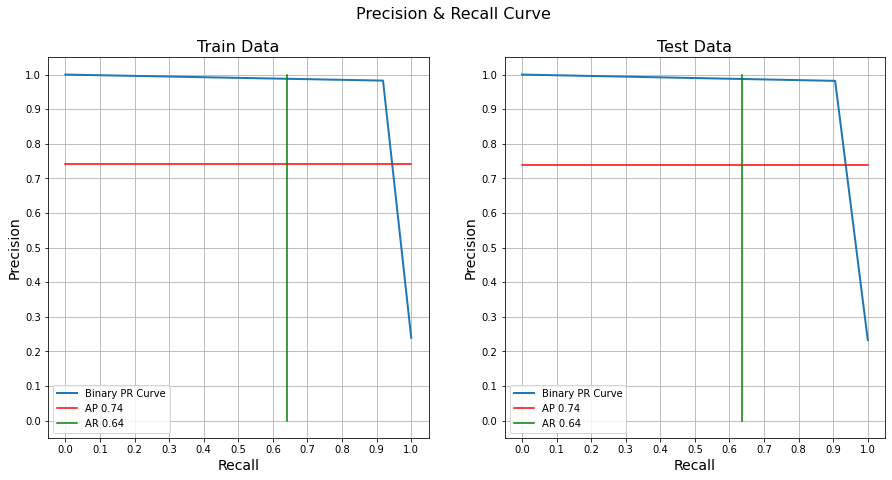

In [55]:
figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred, train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred, train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

In [56]:
unseen_data=pd.read_csv('/content/GCD_Capstone_Project_unseen_data.csv')

In [57]:
unseen_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.5288,2,NaN,low,0.4005,3.0,119045
1,221,D00-PD,NaN,0.7846,2,NaN,low,0.7595,3.0,112223
2,156,D00-SS,NaN,0.5452,2,NaN,medium,0.3365,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.8320,2.0,105922
4,135,D00-SS,NaN,0.4546,2,NaN,low,0.3207,5.0,103297


In [58]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [59]:
def missing_data(data):
  df_miss= pd.DataFrame(index=data.columns.values)
  df_miss["missing"]= data.isna().sum().values
  df_miss['missing %age']=np.round(data.isna().sum().values/data.shape[0], decimals=4)*100
  df_miss.transpose()
  return df_miss

In [60]:
df_miss=missing_data(unseen_data)
df_miss.transpose()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
missing,0.0,2.0,85.0,17.0,0.0,97.0,0.0,3.0,3.0,0.0
missing %age,0.0,2.0,85.0,17.0,0.0,97.0,0.0,3.0,3.0,0.0


In [61]:
unseen_data.duplicated().sum()

0

In [62]:
#filling the missing "None" dept with "D00-OTHER" and "-IT" with "D00-OTHER"	
unseen_data.loc[(unseen_data['department'].isna()), 'department'] ='D00-OTHER'
unseen_data.loc[(unseen_data['department']=='-IT'), 'department'] ='D00-IT'
#filling the missing the filed complaint with 0.0
unseen_data['filed_complaint'].fillna(0.0, inplace=True)
#filling the missing last_evaluation with median value
unseen_data['last_evaluation'].fillna(unseen_data['last_evaluation'].median(), inplace=True)
#filling the missing the recently_promoted with 0.0 as 1.0 = promoted and 0.0 = not promoted
unseen_data['recently_promoted'].fillna(0.0, inplace=True)
#filling the missing satisfaction and tenure with median value
unseen_data['satisfaction'].fillna(unseen_data['satisfaction'].median(), inplace=True)
unseen_data['tenure'].fillna(unseen_data['tenure'].median(), inplace=True)
	

In [63]:
df_miss=missing_data(unseen_data)
df_miss.transpose()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    float64
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    float64
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [65]:
sub_data=unseen_data.copy()

In [66]:
unseen_data.drop(columns=['department', 'employee_id'], inplace=True, axis=1)

In [67]:
final_unseen_data=pd.get_dummies(unseen_data, columns=["salary"],  drop_first=True)
final_unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   filed_complaint    100 non-null    float64
 2   last_evaluation    100 non-null    float64
 3   n_projects         100 non-null    int64  
 4   recently_promoted  100 non-null    float64
 5   satisfaction       100 non-null    float64
 6   tenure             100 non-null    float64
 7   salary_low         100 non-null    uint8  
 8   salary_medium      100 non-null    uint8  
dtypes: float64(5), int64(2), uint8(2)
memory usage: 5.8 KB


In [68]:
pred_unseen_data=rfc.predict(final_unseen_data)

In [69]:
pred_proba_unseen_data=rfc.predict_proba(final_unseen_data)

In [70]:
print(pred_unseen_data)

[1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0]


In [71]:
print(pred_proba_unseen_data)

[[0.01758383 0.98241617]
 [0.90646895 0.09353105]
 [0.03269452 0.96730548]
 [0.99208112 0.00791888]
 [0.55867759 0.44132241]
 [0.98775931 0.01224069]
 [0.90663736 0.09336264]
 [0.97145367 0.02854633]
 [0.98831011 0.01168989]
 [0.99335437 0.00664563]
 [0.96077169 0.03922831]
 [0.03367134 0.96632866]
 [0.0344165  0.9655835 ]
 [0.99531983 0.00468017]
 [0.9790823  0.0209177 ]
 [0.99025272 0.00974728]
 [0.01976433 0.98023567]
 [0.97810333 0.02189667]
 [0.9968294  0.0031706 ]
 [0.97827485 0.02172515]
 [0.09496387 0.90503613]
 [0.02360356 0.97639644]
 [0.95125729 0.04874271]
 [0.93599125 0.06400875]
 [0.32999855 0.67000145]
 [0.98939036 0.01060964]
 [0.94614767 0.05385233]
 [0.99150085 0.00849915]
 [0.09808856 0.90191144]
 [0.91649432 0.08350568]
 [0.98817895 0.01182105]
 [0.99456908 0.00543092]
 [0.98742772 0.01257228]
 [0.96014068 0.03985932]
 [0.99202026 0.00797974]
 [0.97228758 0.02771242]
 [0.95016935 0.04983065]
 [0.02897697 0.97102303]
 [0.98417522 0.01582478]
 [0.93775993 0.06224007]


In [72]:
# sub=pd.DataFrame({'employee_id':sub_data['employee_id'], 'Prediction': pred_unseen_data, 
#                   'Prediction Probability':pred_proba_unseen_data[:,1]})

sub=pd.DataFrame({'employee_id':sub_data['employee_id'], 'Prediction Probability':pred_proba_unseen_data[:,1]})

In [73]:
sub.head()

,employee_id,Prediction Probability
0,119045,0.9824
1,112223,0.0935
2,103924,0.9673
3,105922,0.0079
4,103297,0.4413


In [74]:
sub.to_csv("HR_submission.csv", index=False, header=False)

<a id = Section9></a>
## **9. Conclusion**

- We **studied in depth about the Employee data**, its **characteristics** and its **distribution**.

- We **performed model development** with **variety** of **algorithms** such as **Logistic Regression, Random Forest, Adaboost, GradientBoosting and KNN**.

- **On observering** the **performance** of **Random Forest & GradientBoosting** it could be clearly visualized that **Random Forest** was **overfitting while Gradiet Boosting** was **giving good scores because of default objective**.

- **One could choose either** of these **model or both** and **tune** it **at best settings**.

- **If both** models are **tuned** at **optimal settings**, a **comparision** is **required** to **select** the **optimal working model**.

- We **choosed Random Forest Classsfier** and **finalized** which **in resulted** a **promising performance**.

- Now this **model** will **help** us in **saving** a **employees** attrition (human resources etc.) but **also help** us in **identify** which **emplyees** are **likely to leave**.